# Explore here

In [102]:
#adjuntamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
#download data
url= 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
df = pd.read_csv(url, sep=',', encoding='utf-8', quotechar='"')
df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [104]:
#Muestro las 5 primeras y 5 ultimas filas para saber de que se trtara el dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [105]:
#Veo las dimensiones del data set
df_dimen=df.shape
#Observo los tipos de datos y valores nulos
df.info()
#------
print (df_dimen)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [106]:
 df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [107]:
#quiero saber mis valores nulos
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [108]:
#por lo visto en host_id pueden haber duplicados, asi que revisare cuantos exactamente
hosts = df['host_id'].value_counts()
# Número de hosts con más de un anuncio
multi_hosts = (hosts > 1).sum()
print(f'Hay {multi_hosts} anfitriones con más de un anuncio.')
#Ahora muestro las filas duplicadas
df[df.duplicated(subset=['neighbourhood_group', 'room_type', 'price'], keep=False)]

Hay 5154 anfitriones con más de un anuncio.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Por lo visto, pueden haber duplicados

In [109]:
#quiero estar seguro de no borrar informacion necesaria
#ahora quiero saber si hay filas totalmente identicas
duplicates = df.duplicated().sum()
print(f'Hay {duplicates} filas completamente duplicadas.')


Hay 0 filas completamente duplicadas.


In [110]:
#Analizo los anfitriones con mas alojamientos
top_hosts = df.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).head(10)
print("Top 10 anfitriones con más anuncios:\n")
print(top_hosts)

Top 10 anfitriones con más anuncios:

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
16098958   Jeremy & Laura        96
12243051   Sonder                96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
dtype: int64


In [111]:
#Vamos a seleccionar los datos relevantes
df.drop(["id", "name", "host_id", "host_name", "latitude", "longitude"], axis=1, inplace=True)

df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


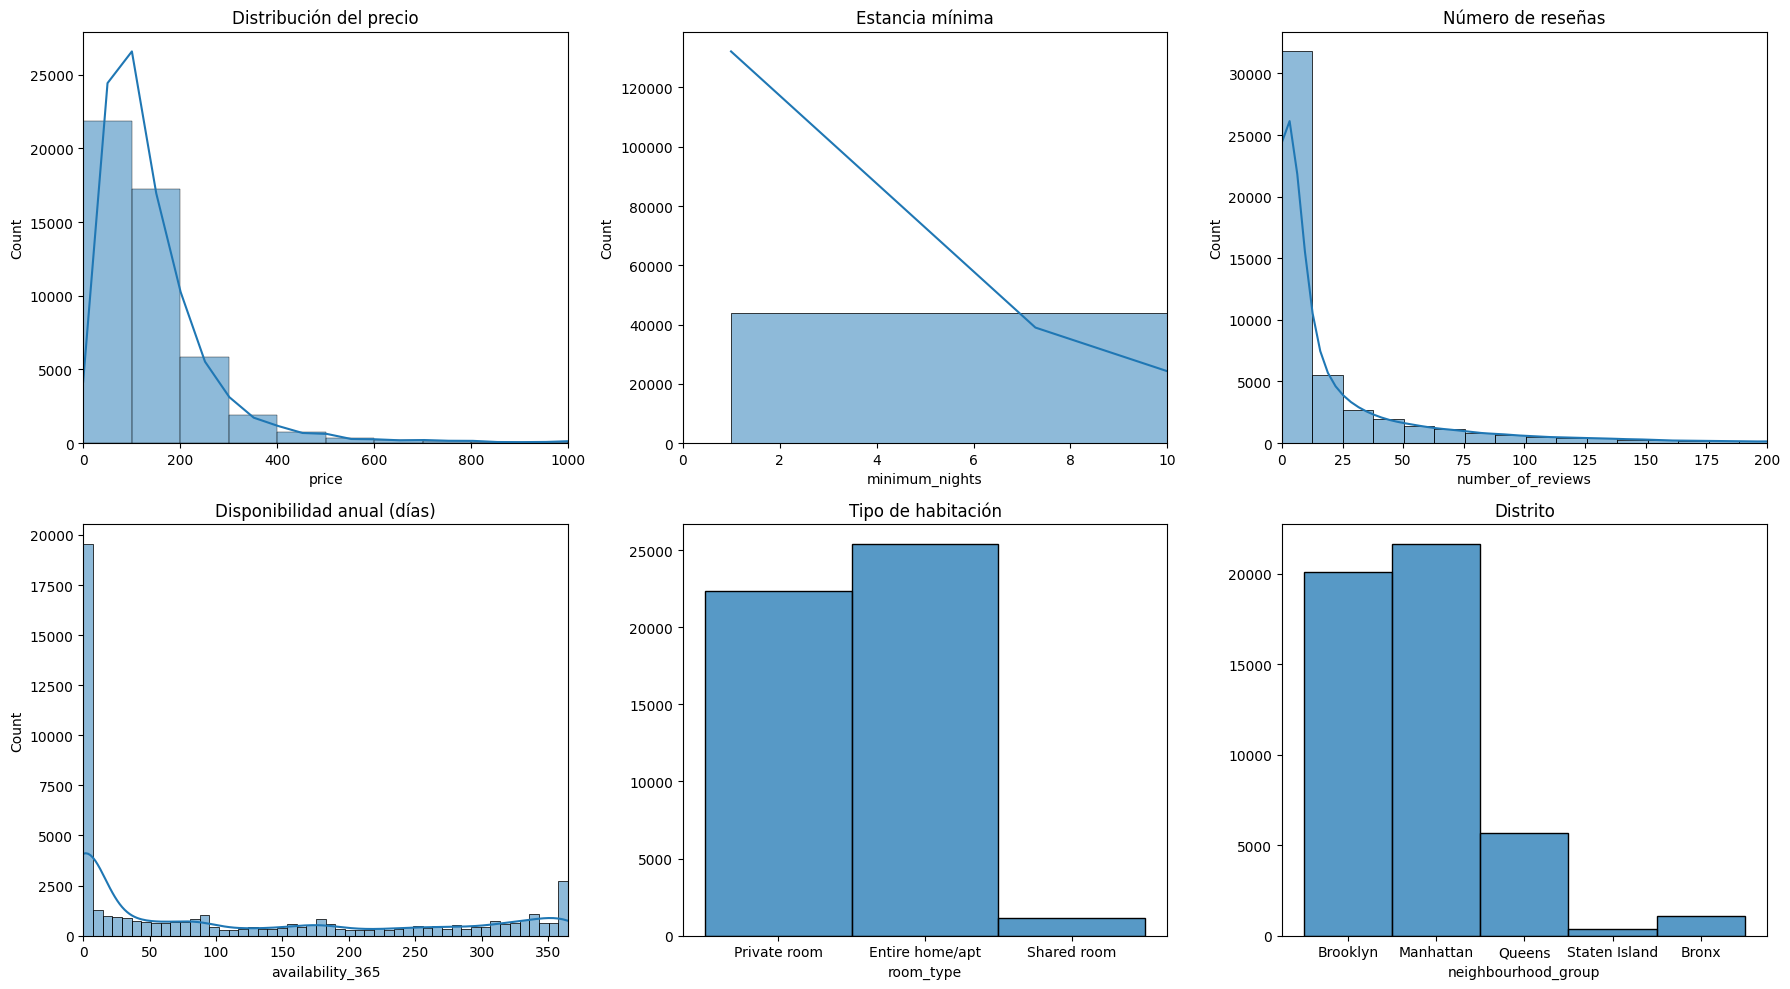

In [112]:
#Ahora Identifico la frecuencia de mis datos
fig, axis = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axis[0, 0], data=df, x="price", bins=100, kde=True)
axis[0, 0].set_title("Distribución del precio")
axis[0, 0].set_xlim(0, 1000)

sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=50, kde=True)
axis[0, 1].set_title("Estancia mínima")
axis[0, 1].set_xlim(0, 10)

sns.histplot(ax=axis[0, 2], data=df, x="number_of_reviews", bins=50, kde=True)
axis[0, 2].set_title("Número de reseñas")
axis[0, 2].set_xlim(0, 200)

sns.histplot(ax=axis[1, 0], data=df, x="availability_365", bins=50, kde=True)
axis[1, 0].set_title("Disponibilidad anual (días)")
axis[1, 0].set_xlim(0, 365)

sns.histplot(ax=axis[1, 1], data=df, x="room_type", kde=False)
axis[1, 1].set_title("Tipo de habitación")
axis[1, 1].set_ylabel(None)

sns.histplot(ax=axis[1, 2], data=df, x="neighbourhood_group", kde=False)
axis[1, 2].set_title("Distrito")
axis[1, 2].set_ylabel(None)
plt.tight_layout()
plt.show()

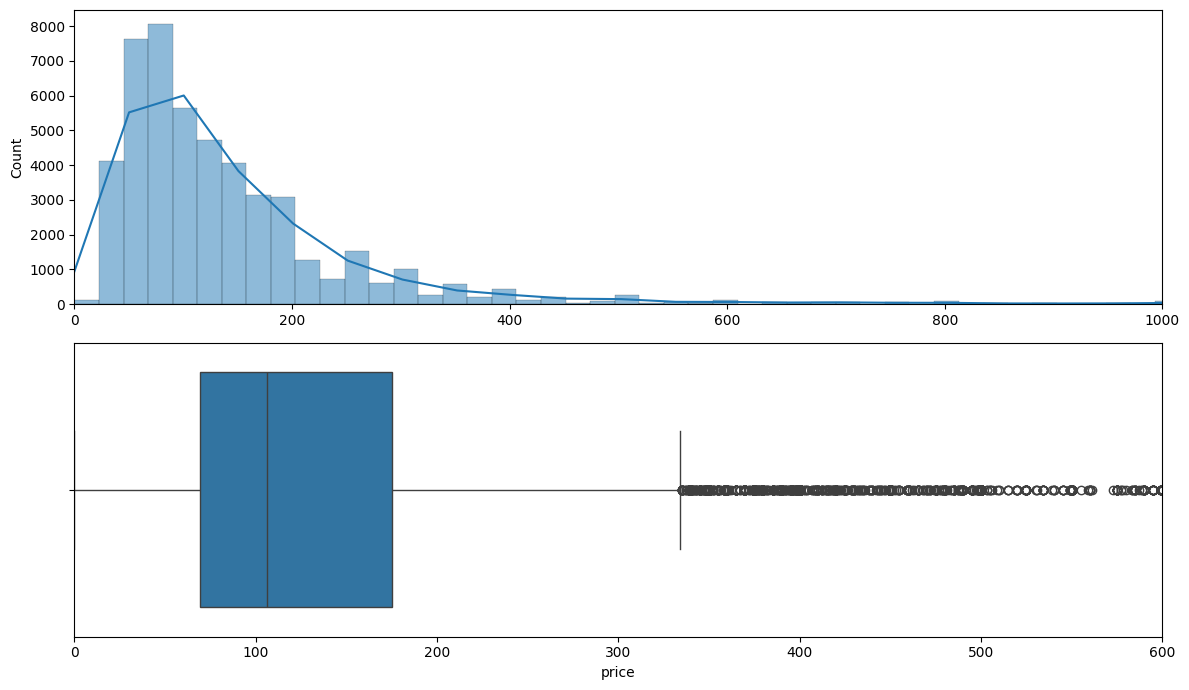

In [113]:
fig, axis = plt.subplots(2, 1, figsize=(12, 7))

sns.histplot(ax=axis[0], data=df, x="price", kde=True).set(xlabel=None)
axis[0].set_xlim(0, 1000)
sns.boxplot(ax=axis[1], data=df, x="price")
axis[1].set_xlim(0, 600)

plt.tight_layout()

plt.show()

Por lo visto hay una media de precio por noche de $100 a $200, y que hay una gran cantidad de outliers por encima de $350

<Axes: >

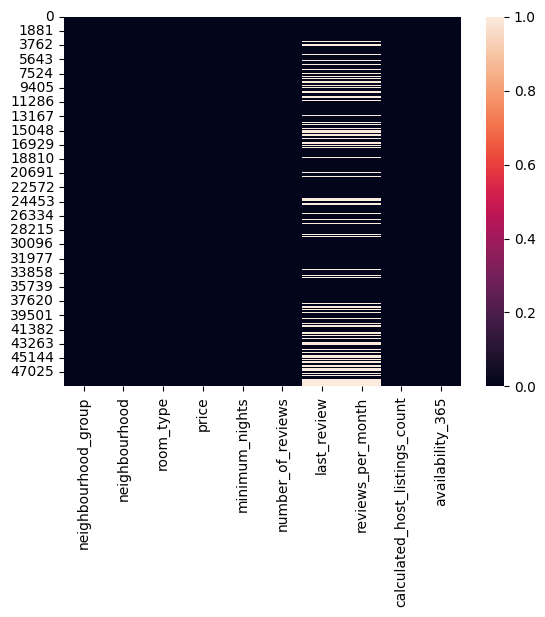

In [114]:
df.isna().sum()
sns.heatmap(df.isna())

Por lo que veo hay una cantidad dispersa de valores nulo entre las columnas `last_review` y `reviews_per_month`

Asi que para tener un mejor ML tengo que reemplazar los nulos por 0 y eliminar `last_review`.

In [115]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["last_review"] = df["last_review"].fillna("No reviews")
#------------------
df.drop("last_review", axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


Listo, ahora quiero evaluar cómo varían los outliers de `price` entre los distintos `neighbourhood_group`, para entender si la variable presenta valores extremos dependientes del barrio.

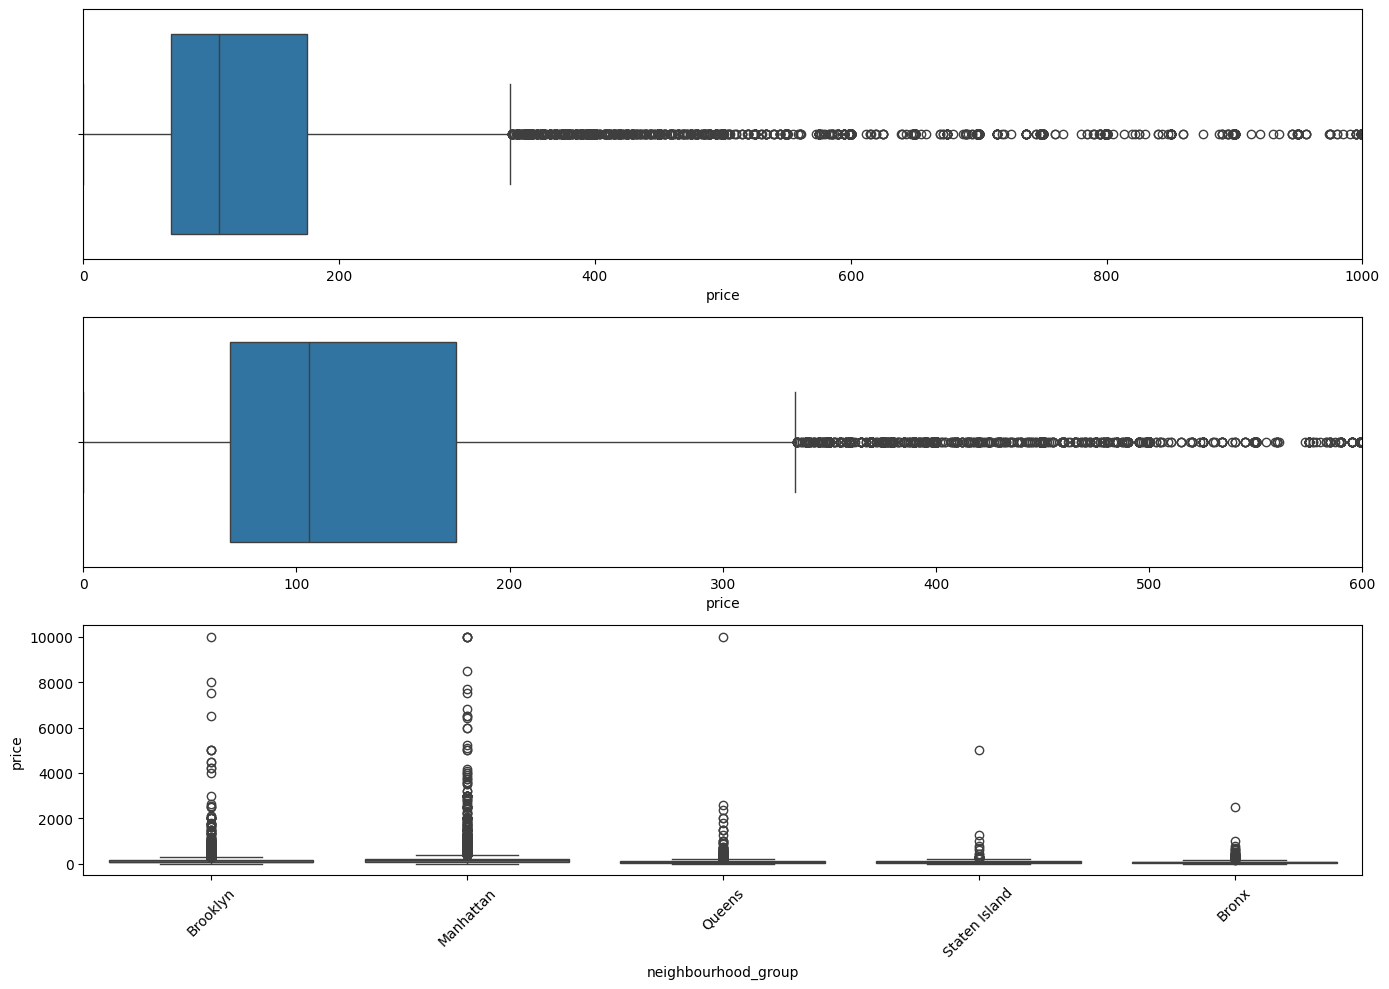

In [116]:
fig, axis = plt.subplots(3, 1, figsize=(14, 10))

sns.boxplot(ax=axis[0], data=df, x="price")
axis[0].set_xlim(0, 1000)

# Boxplot con zoom
sns.boxplot(ax=axis[1], data=df, x="price")
axis[1].set_xlim(0, 600)

# Boxplot por zona
sns.boxplot(ax=axis[2], data=df, x="neighbourhood_group", y="price")
axis[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

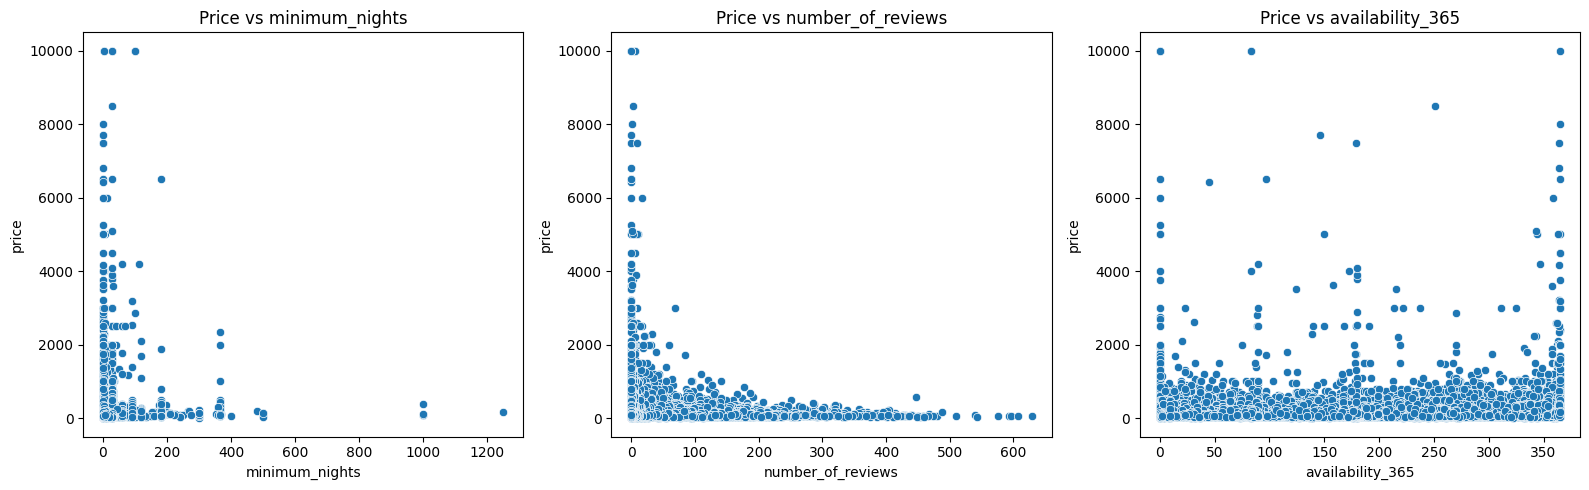

In [117]:
fig, axis = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(ax=axis[0], data=df, x="minimum_nights", y="price")
axis[0].set_title("Price vs minimum_nights")

sns.scatterplot(ax=axis[1], data=df, x="number_of_reviews", y="price")
axis[1].set_title("Price vs number_of_reviews")

sns.scatterplot(ax=axis[2], data=df, x="availability_365", y="price")
axis[2].set_title("Price vs availability_365")

plt.tight_layout()
plt.show()

Ahora sigo con la Matriz de Correlacion

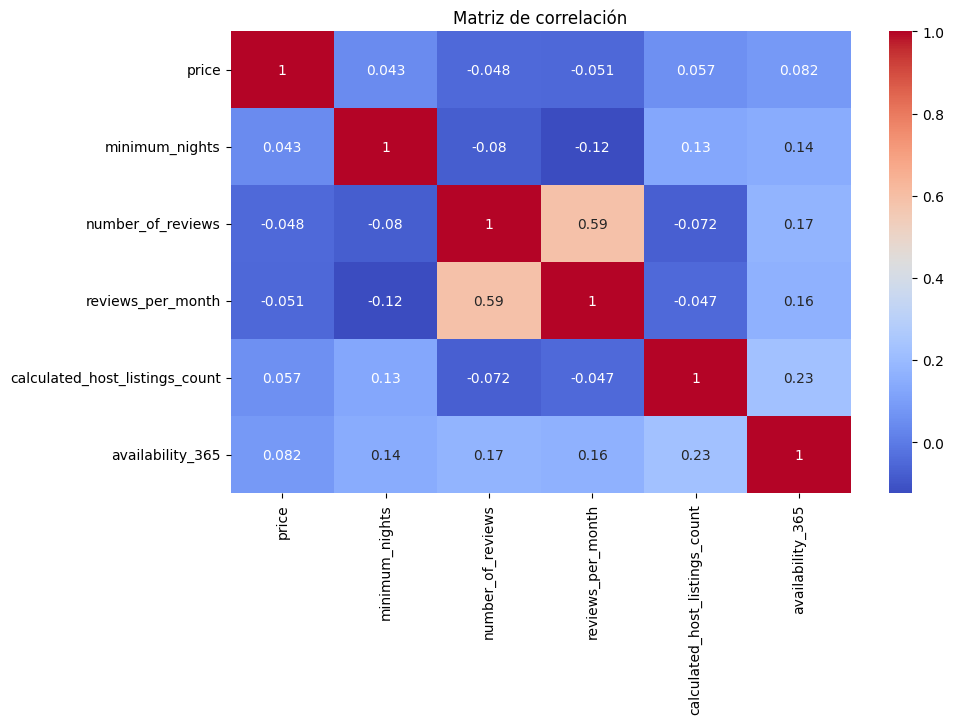

In [120]:
num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

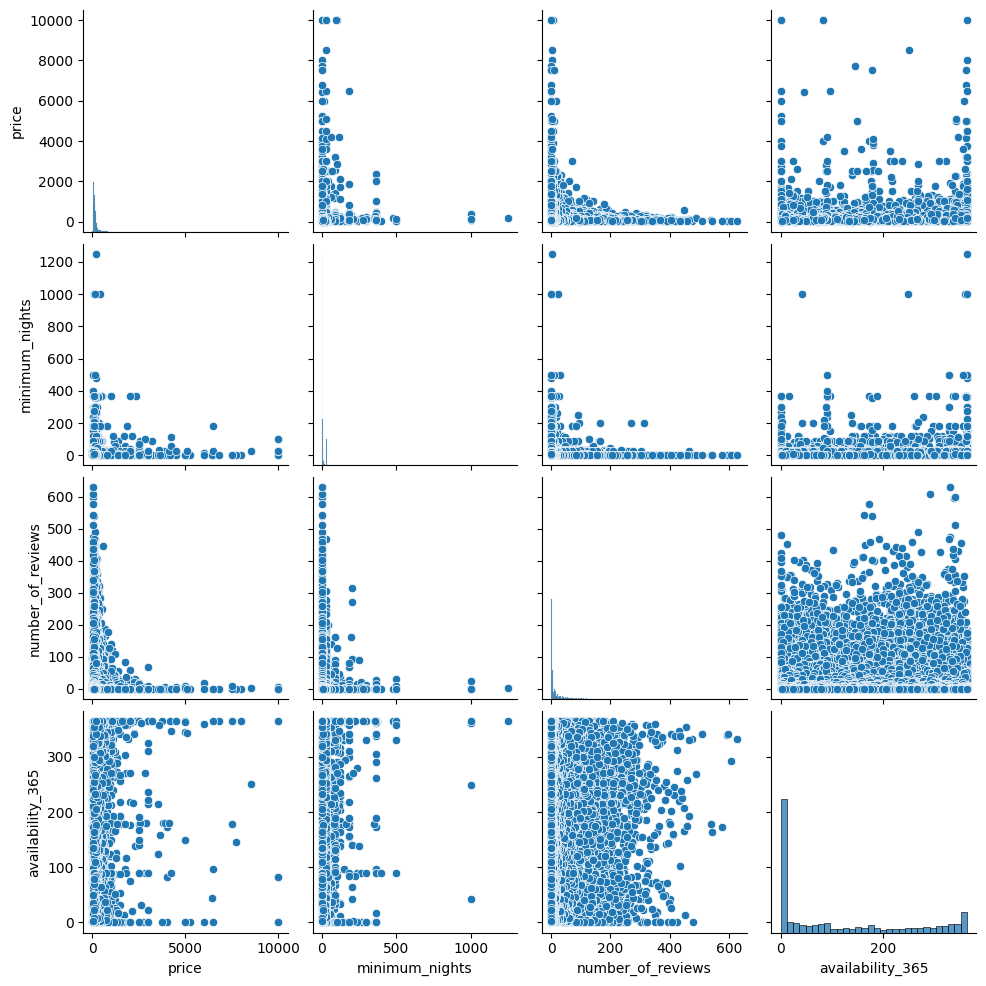

In [121]:
sns.pairplot(df[["price","minimum_nights","number_of_reviews","availability_365"]])